# Practical Assignment: Binary Classification using Logistic Regression, Neural Networks, and Random Forest

### Problem Statement
In this assignment, you'll predict the presence of heart disease in patients using clinical data. This practical exercise involves real-world binary classification, employing techniques you've learned:
- Logistic Regression
- Neural Networks
- Random Forest

### Dataset Description
The dataset used is the [Heart Disease UCI dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease), which contains medical attributes such as age, cholesterol levels, blood pressure, and more.

The task is to predict whether a patient has heart disease (target = 1) or not (target = 0).

### Objectives
- Perform exploratory data analysis (EDA)
- Preprocess data effectively
- Train and evaluate models: Logistic Regression, Neural Networks, Random Forest
- Compare the performance of models using appropriate metrics


In [6]:
# try:
#     import ucimlrepo
#     print("ucimlrepo is already installed.")
# except ImportError:
#     print("ucimlrepo not found. Installing...")
#     !pip install ucimlrepo
#     import ucimlrepo
#     print("ucimlrepo has been installed.")


In [7]:
# from ucimlrepo import fetch_ucirepo 
  
# # fetch dataset 
# heart_disease = fetch_ucirepo(id=45) 
  
# # data (as pandas dataframes) 
# X = heart_disease.data.features 
# y = heart_disease.data.targets 
  
# # metadata 
# print(heart_disease.metadata) 
  
# # variable information 
# print(heart_disease.variables) 


In [9]:
try:
    import tensorflow
    print("TensorFlow is already installed.")
except ImportError:
    print("TensorFlow not found. Installing...")
    import os
    os.system('pip install tensorflow')
    import tensorflow
    print("TensorFlow has been installed.")

TensorFlow not found. Installing...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 22.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 23.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 63.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 87.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
2025-05-24 14:16:16.435827: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-24 14:16:16.479925: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-24 14:16:16.708989: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-24 14:16:16.869681: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748096178.629008    9404 cuda_dnn.cc:8579] Unable to register c

TensorFlow has been installed.


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model


## Load the dataset

In [11]:
# Load the dataset
url = "heart.csv"
df = pd.read_csv(url)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis

In [12]:
# Check data information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
# Check for missing values
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

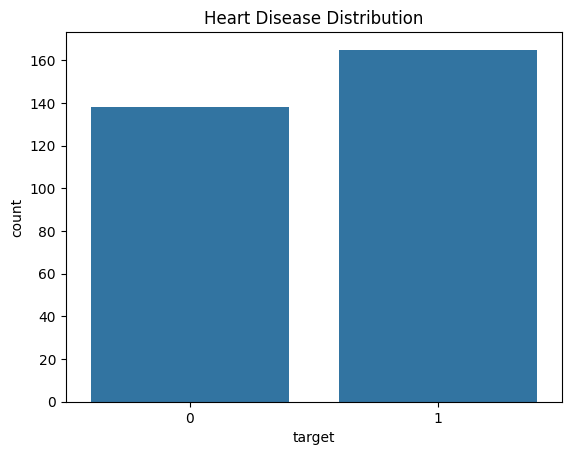

In [14]:
# Visualize class distribution
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()


### Perform various visualization to understand the nature of data

In [15]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


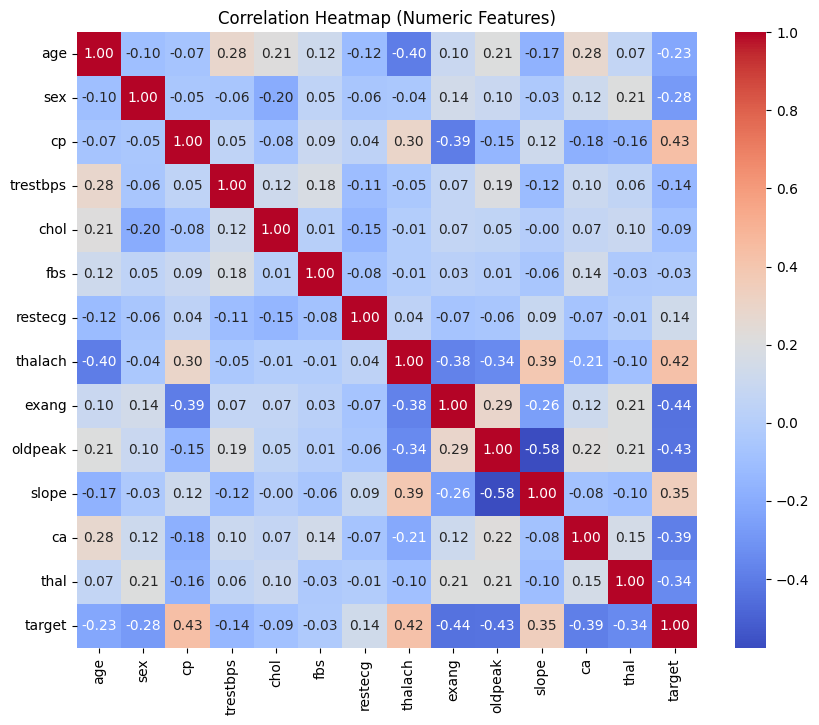

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [24]:
df.shape

(303, 14)

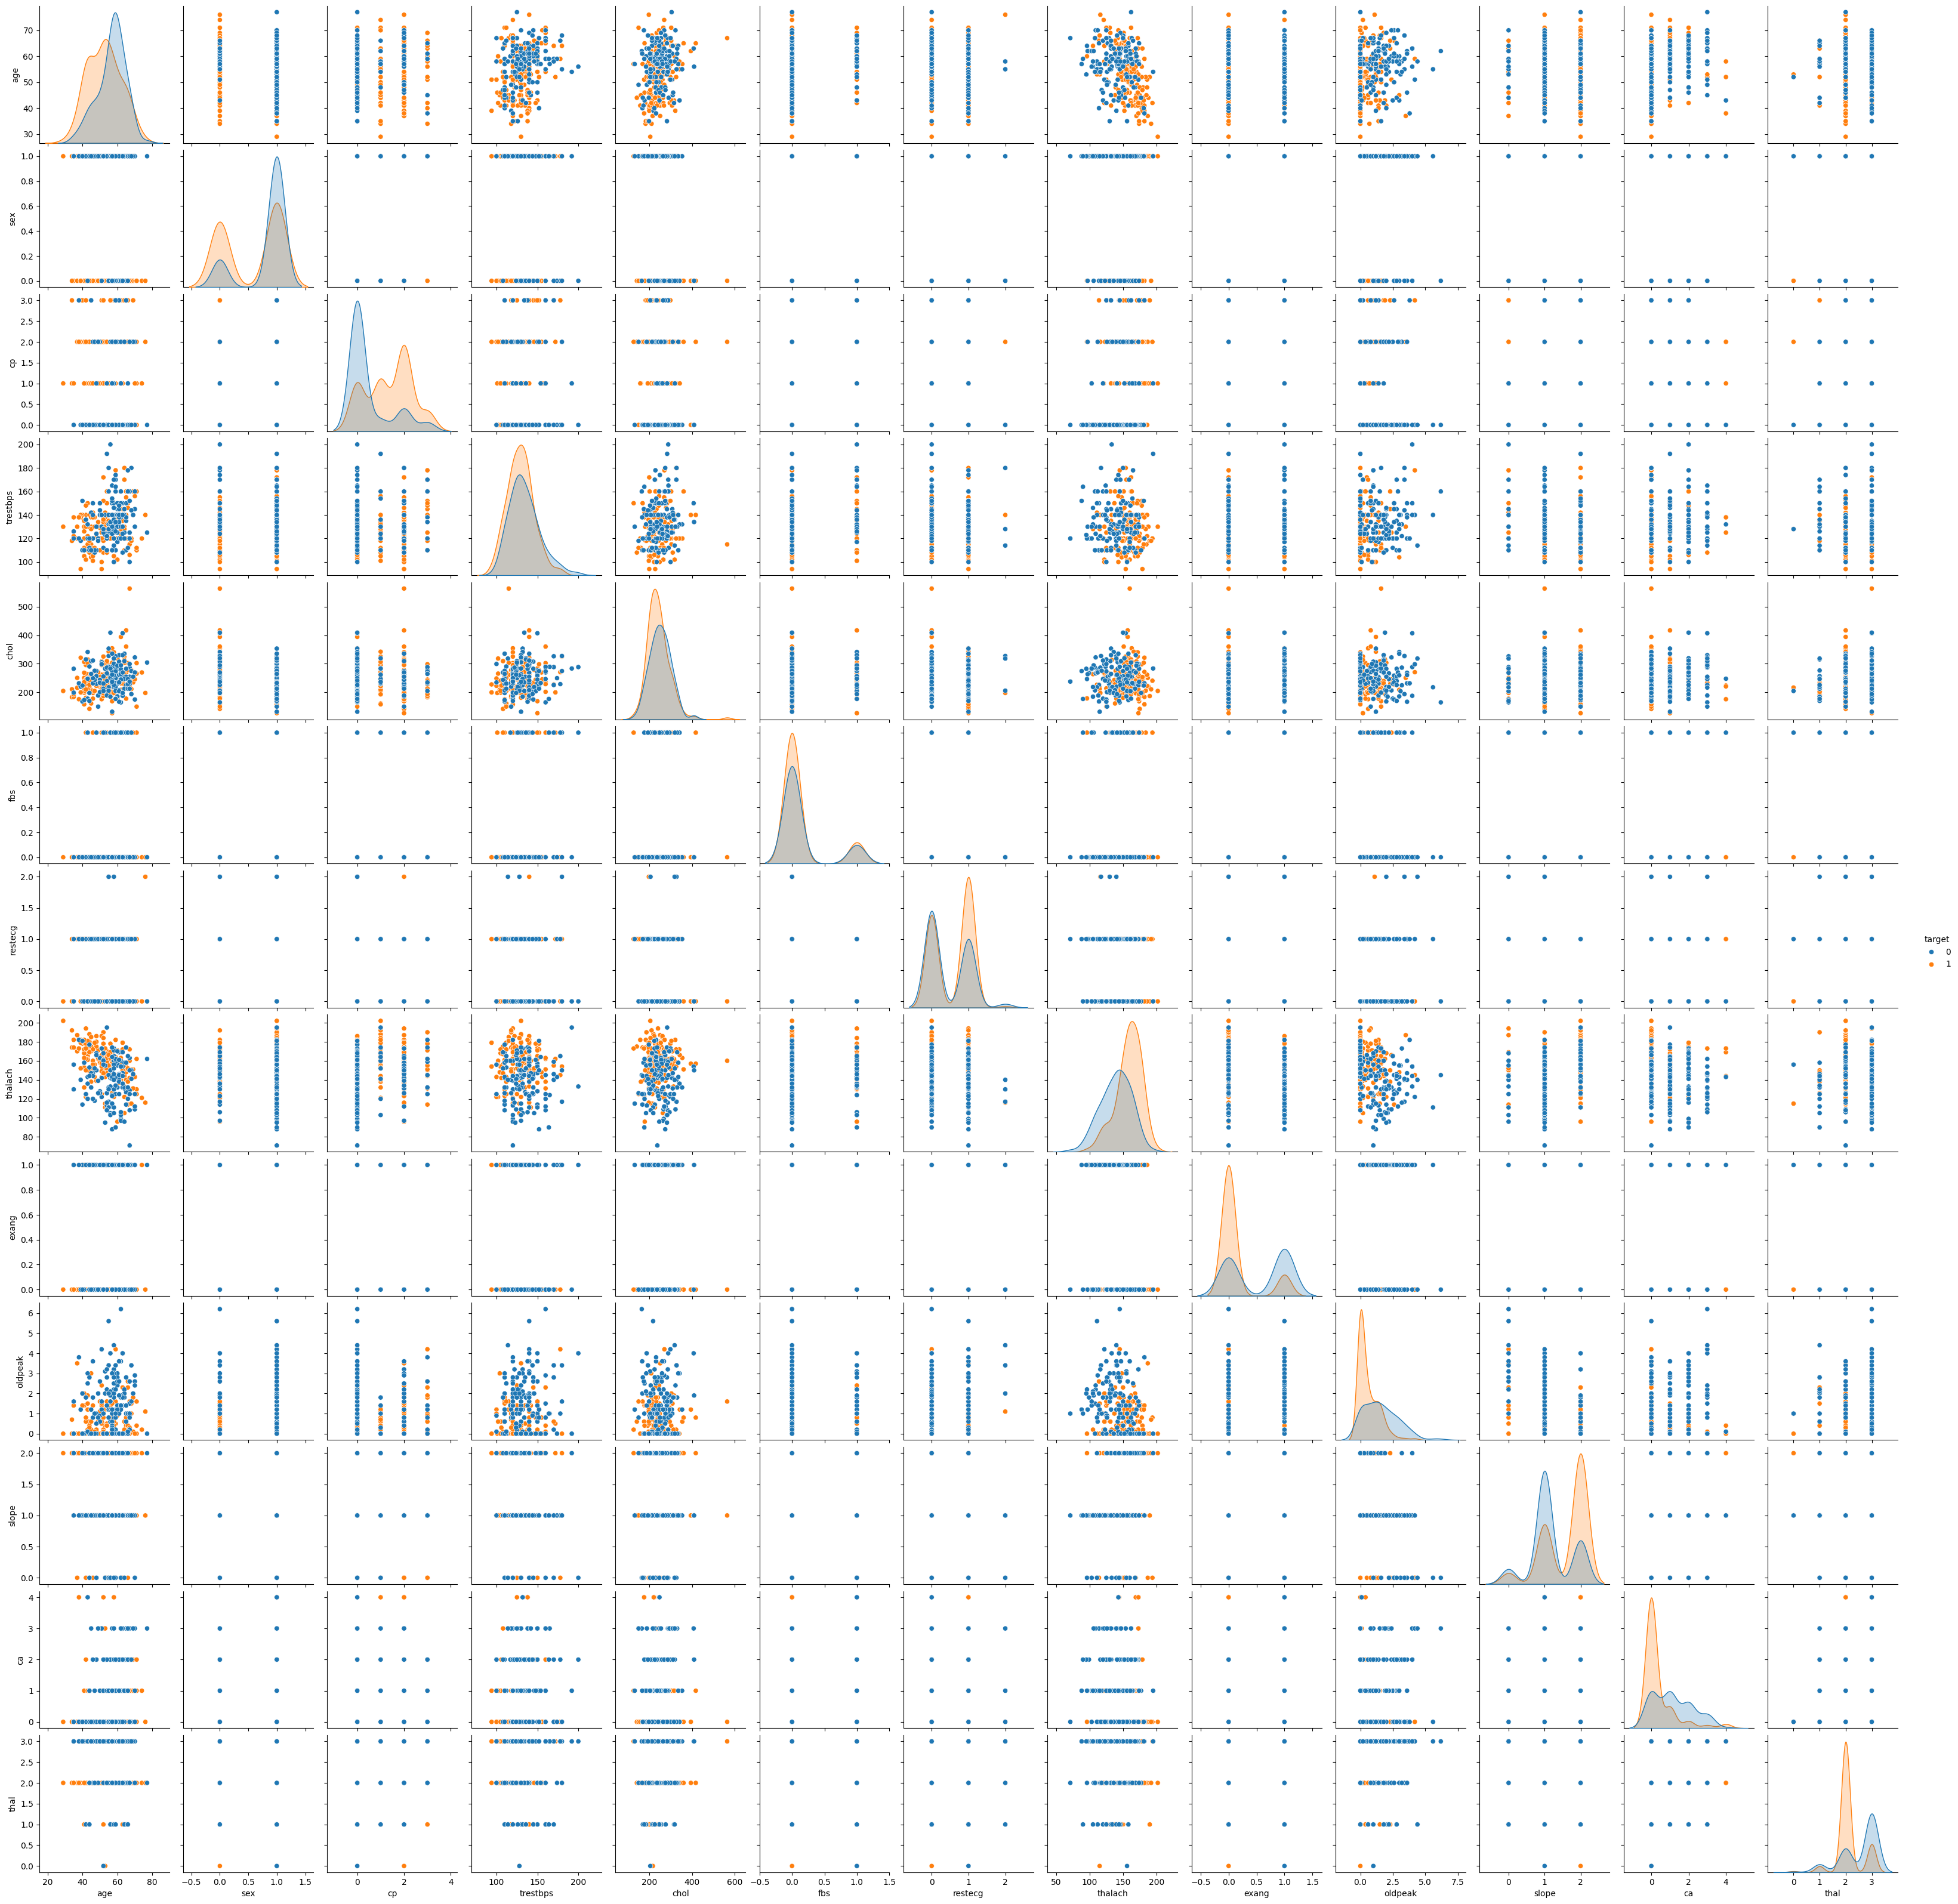

In [25]:
import seaborn as sns
sns.pairplot(df, hue="target") 

In [28]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

age: [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex: [1 0]
cp: [3 2 1 0]
trestbps: [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol: [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs: [1 0]

In [36]:
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
df['ca'] = df['ca'].replace(4, 3)

In [38]:
if (df['thal'] == 0).sum() > 0:
    mode_thal = df['thal'].mode()[0]
    df['thal'] = df['thal'].replace(0, mode_thal)

In [39]:
cat_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [40]:
df_encoded.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,cp_3,restecg_1,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1,False,...,True,False,False,False,False,False,False,False,False,False
1,37,1,130,250,0,187,0,3.5,1,False,...,False,True,False,False,False,False,False,False,True,False
2,41,0,130,204,0,172,0,1.4,1,True,...,False,False,False,False,True,False,False,False,True,False
3,56,1,120,236,0,178,0,0.8,1,True,...,False,True,False,False,True,False,False,False,True,False
4,57,0,120,354,0,163,1,0.6,1,False,...,False,True,False,False,True,False,False,False,True,False


## Data Preprocessing

- Divide the data into Features and Target
- Perform Feature Scaling
- Divide the data into Training and Test Sets

## Logistic Regression Model

- Initialize a Logistic Regression Model
- Train the model
- Find the Training Accuracy, Precision, Recall, F1 Score
- Find the Test Accuracy, Precision, Recall, F1 Score
- Visualize Train and Test Confusion Metrics
- Visualize the Training and Test Performance Metrics
- Add more cells as required.

## Neural Network Model

- Design a Neural Network Model
- Train the model
- Find the Training Accuracy, Precision, Recall, F1 Score
- Find the Test Accuracy, Precision, Recall, F1 Score
- Plot the train and test accuracy after each epoch (Hint: Use History)
- Visualize Train and Test Confusion Metrics
- Visualize the Training and Test Performance Metrics
- Add more cells as required.

## Random Forest Model

- Design a Random Forest Model
- Train the model
- Find the Training Accuracy, Precision, Recall, F1 Score
- Find the Test Accuracy, Precision, Recall, F1 Score
- Visualize Train and Test Confusion Metrics
- Visualize the Training and Test Performance Metrics
- Identify the most important features
- Train the model on top 5 features, does it perform better than the model trained with all the features?
- Add more cells as required.

## Model Comparison

- Compare the performance on Test set for each model on Accuracy, Precision and Recall
- Use Visualization Techniques
- Draw ROC Curves for each of the three model
- What we learn from ROC Curves?
- Add more cells as required.

## More........
1. Improve preprocessing steps (feature engineering, outlier detection, etc.) and observe any changes in the model performance.
2. Experiment with hyperparameter tuning for each model. Document your approach and results.
3. Record the training time for each model and compare them using bar chart.
4. Learn about k-fold cross validation and implement it.
5. What are the advantages of k-fold cross validation?
6. Discuss the strengths and weaknesses of each model based on your experiments.
7. Is more complex model always the best?
